<a href="https://colab.research.google.com/github/Resia05/supervised-learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%222_3_1_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорти та завантаження даних

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
import joblib
import warnings
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

In [11]:
from google.colab import drive
drive.mount('/content/drive') # закоментувала, щоб не підклбчатись щоразу. При першому запуску кода потрібно прибрати комент

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



попередньо потрібно додати сюди в середовище файл process_bank_churn

In [14]:
%load_ext autoreload
%autoreload 2

from process_bank_churn import preprocess_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
raw_df = pd.read_csv('train.csv')
data = preprocess_data(raw_df)

In [16]:
data

{'X_train':        CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
 0         0.599045  0.214286     0.1  0.626382       0.000000        1.0   
 1         0.603819  0.375000     0.2  0.848836       0.000000        1.0   
 2         0.653938  0.303571     0.6  0.554522       0.333333        1.0   
 3         0.568019  0.714286     0.0  0.000000       0.333333        0.0   
 4         0.658711  0.053571     0.3  0.000000       0.333333        1.0   
 ...            ...       ...     ...       ...            ...        ...   
 11995     0.482100  0.267857     0.4  0.000000       0.333333        0.0   
 11996     0.577566  0.392857     0.1  0.000000       0.000000        1.0   
 11997     0.453461  0.196429     0.8  0.000000       0.333333        1.0   
 11998     0.379475  0.428571     0.7  0.000000       0.333333        0.0   
 11999     0.272076  0.160714     0.2  0.000000       0.333333        1.0   
 
        IsActiveMember  EstimatedSalary  Geography_France  Geog

In [40]:
data['X_train']

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,1.0
1,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,0.0
2,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,1.0
3,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,1.0
4,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.482100,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,0.0
11996,0.577566,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,0.0
11997,0.453461,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,1.0
11998,0.379475,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,1.0


# Тренування моделі

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

# Натренуємо дерево з зафіксованим random_state
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, train_targets)

# Визначимо важливість ознак
feature_importances = tree_clf.feature_importances_

# Створимо DataFrame для важливості ознак
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Виведемо топ 10 найвпливовіших ознак
top10_features = importance_df.sort_values(by='importance', ascending=False).head(10)
print("Топ 10 найвпливовіших ознак:")
print(top10_features)

# Оцінимо модель за допомогою ROC AUC на тренувальних і тестувальних даних
train_preds = tree_clf.predict_proba(X_train)[:, 1]
val_preds = tree_clf.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

print(f"\nROC AUC на тренувальних даних: {train_auc:.4f}")
print(f"ROC AUC на тестувальних даних: {val_auc:.4f}")

# Отримаємо глибину дерева
tree_depth = tree_clf.get_depth()

print(f"Глибина дерева: {tree_depth}")

Топ 10 найвпливовіших ознак:
              feature  importance
1                 Age    0.356639
4       NumOfProducts    0.168379
7     EstimatedSalary    0.126598
0         CreditScore    0.122589
3             Balance    0.078428
2              Tenure    0.054646
6      IsActiveMember    0.033404
11        Gender_Male    0.017746
9   Geography_Germany    0.015110
5           HasCrCard    0.010435

ROC AUC на тренувальних даних: 1.0000
ROC AUC на тестувальних даних: 0.7741
Глибина дерева: 26


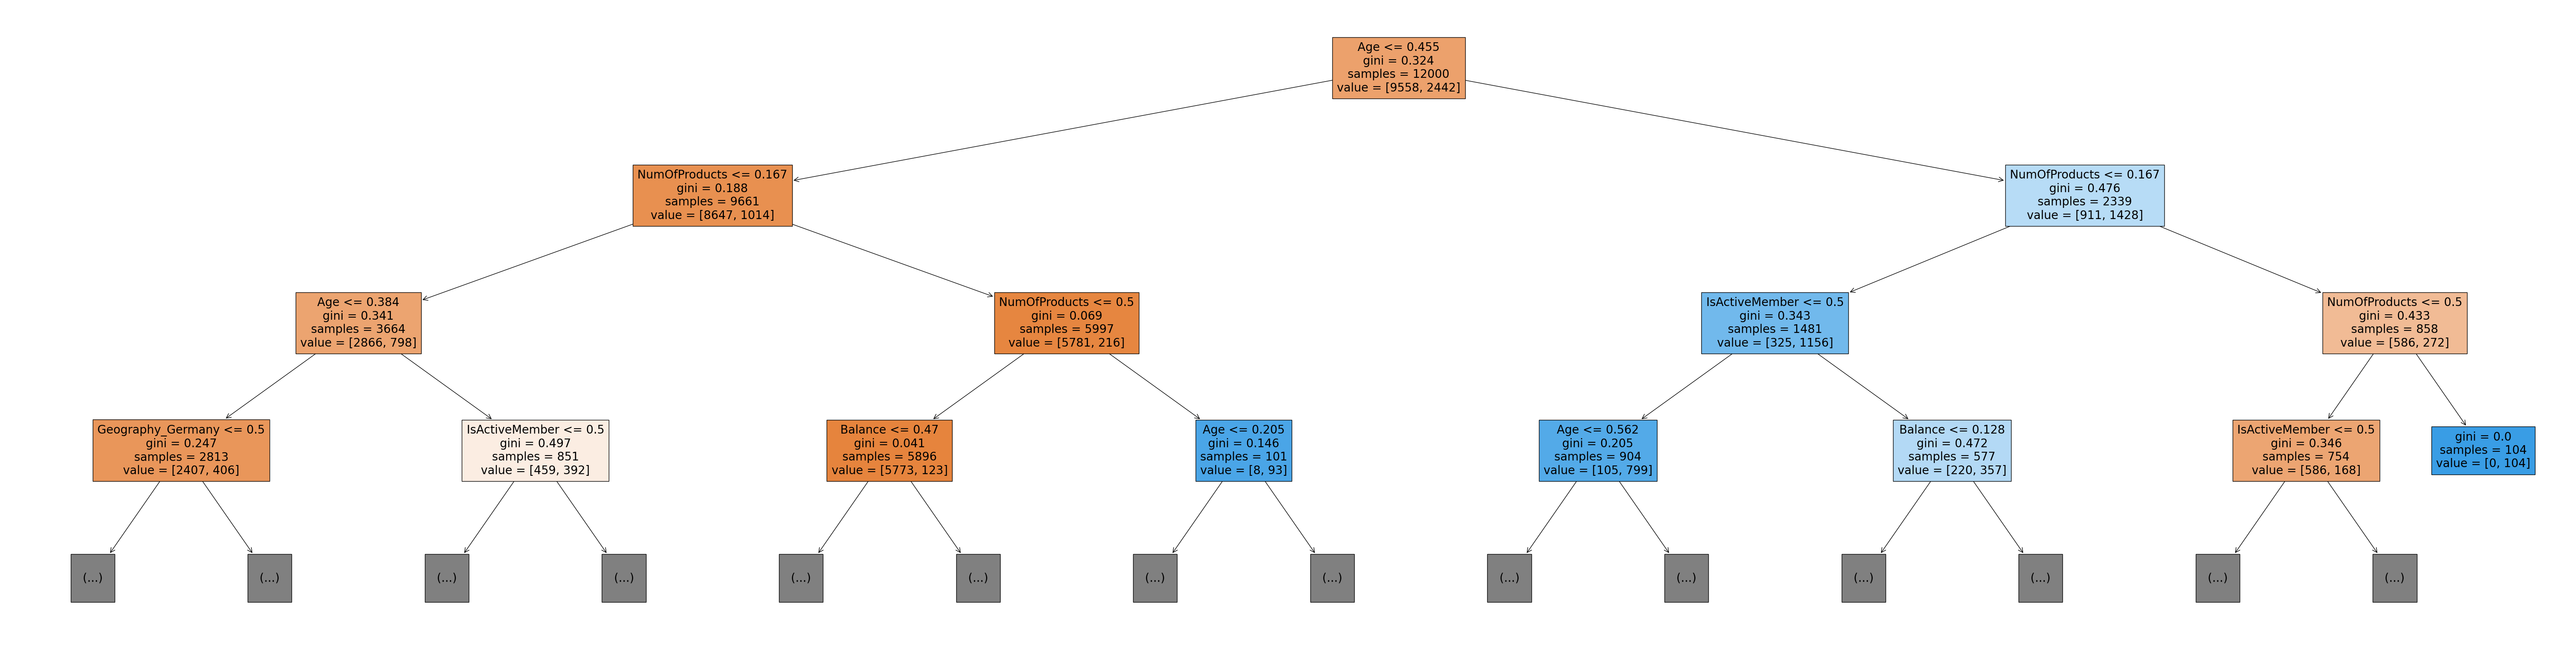

In [55]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);

Модель перенавчилась, ідеальний результат на тренувальних даних і велика похибка на тестових даних.

In [56]:
# Натренуємо дерево з глибиною 2
tree_clf_depth2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_depth2.fit(X_train, train_targets)

# Визначимо важливість ознак для дерева з глибиною 2
feature_importances_depth2 = tree_clf_depth2.feature_importances_

# Створимо DataFrame для важливості ознак дерева з глибиною 2
importance_df_depth2 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances_depth2
})

# Виведемо топ 10 найвпливовіших ознак для дерева з глибиною 2
top10_features_depth2 = importance_df_depth2.sort_values(by='importance', ascending=False).head(10)
print("\nТоп 10 найвпливовіших ознак для дерева з глибиною 2:")
print(top10_features_depth2)

# Оцінимо модель за допомогою ROC AUC на тренувальних і тестувальних даних для дерева з глибиною 2
train_preds_depth2 = tree_clf_depth2.predict_proba(X_train)[:, 1]
val_preds_depth2 = tree_clf_depth2.predict_proba(X_val)[:, 1]

train_auc_depth2 = roc_auc_score(train_targets, train_preds_depth2)
val_auc_depth2 = roc_auc_score(val_targets, val_preds_depth2)

print(f"\nROC AUC на тренувальних даних для дерева з глибиною 2: {train_auc_depth2:.4f}")
print(f"ROC AUC на тестувальних даних для дерева з глибиною 2: {val_auc_depth2:.4f}")



Топ 10 найвпливовіших ознак для дерева з глибиною 2:
             feature  importance
1                Age    0.714962
4      NumOfProducts    0.285038
0        CreditScore    0.000000
2             Tenure    0.000000
3            Balance    0.000000
5          HasCrCard    0.000000
6     IsActiveMember    0.000000
7    EstimatedSalary    0.000000
8   Geography_France    0.000000
9  Geography_Germany    0.000000

ROC AUC на тренувальних даних для дерева з глибиною 2: 0.8429
ROC AUC на тестувальних даних для дерева з глибиною 2: 0.8465


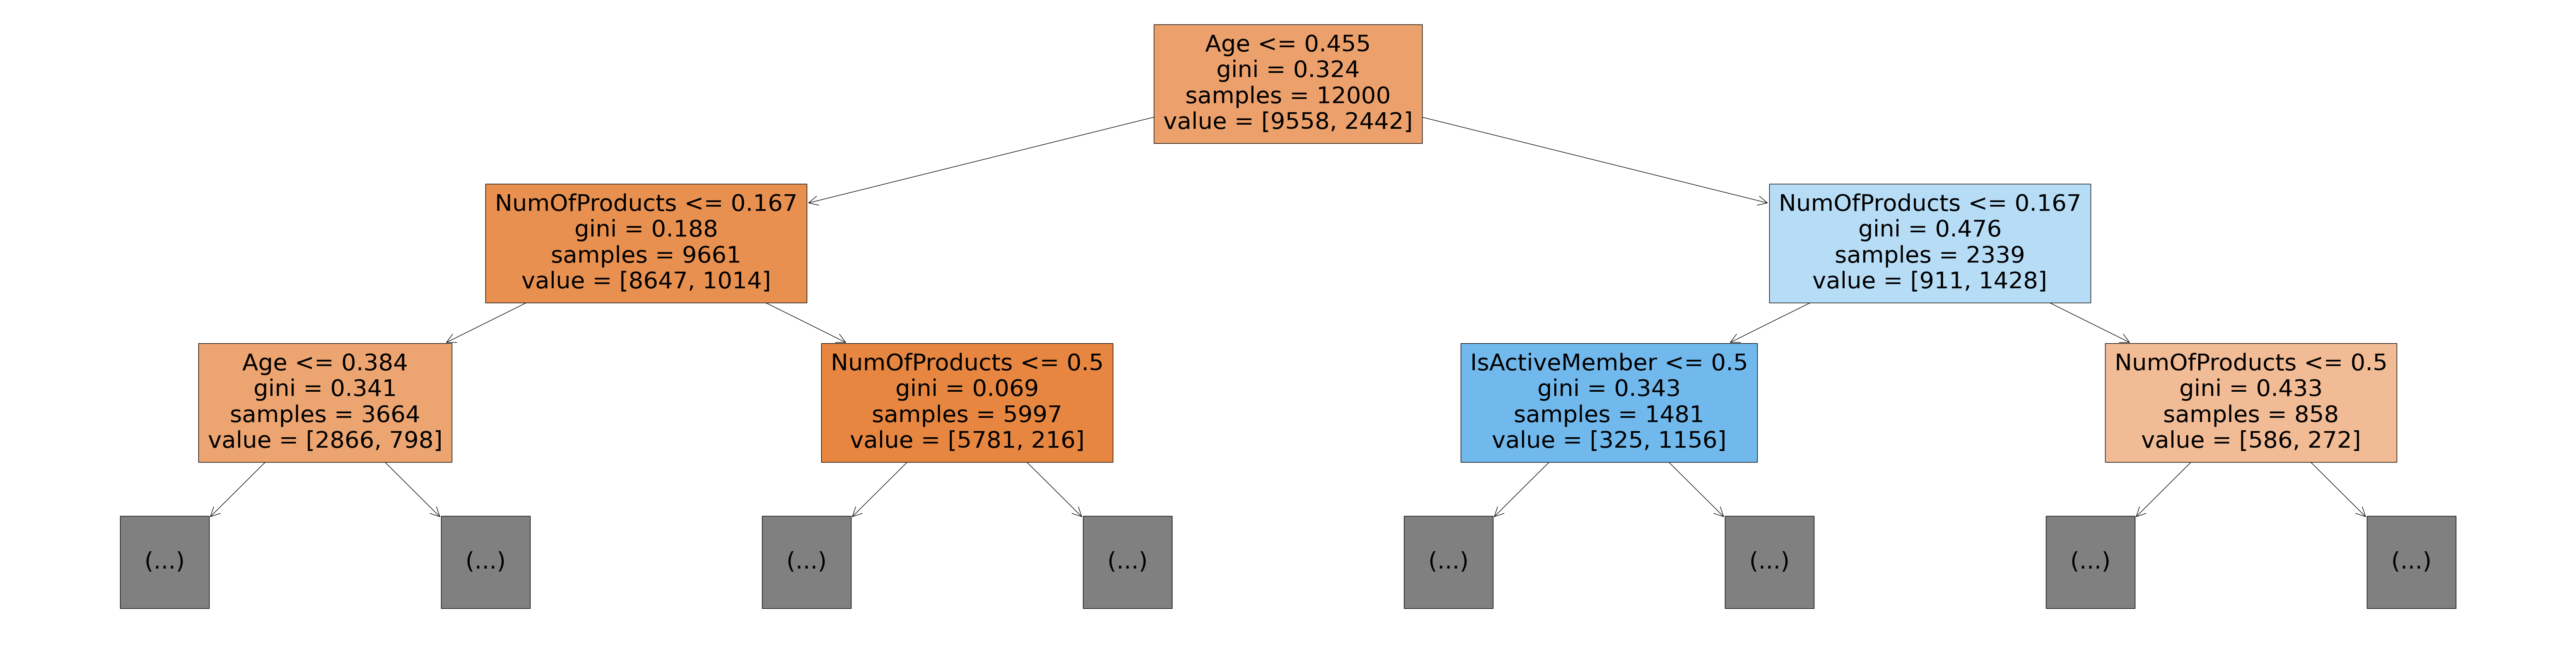

In [57]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Введіть ваші варіанти параметрів max_leaf_nodes і max_depth
max_leaf_nodes = int(input("Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): ") or None)
max_depth = int(input("Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): ") or None)

# Натренуємо модель з введеними параметрами
tree_clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=42)
tree_clf.fit(X_train, train_targets)

# Отримаємо глибину натренованого дерева
tree_depth = tree_clf.get_depth()

# Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
train_preds = tree_clf.predict_proba(X_train)[:, 1]
val_preds = tree_clf.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

# Виведемо результати для введених параметрів і глибини дерева
print(f"Параметри: max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}, глибина дерева={tree_depth}")
print(f"ROC AUC на тренувальних даних: {train_auc:.4f}")
print(f"ROC AUC на валідаційних даних: {val_auc:.4f}")


Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): 5
Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): 5
Параметри: max_leaf_nodes=5, max_depth=5, глибина дерева=3
ROC AUC на тренувальних даних: 0.8687
ROC AUC на валідаційних даних: 0.8595


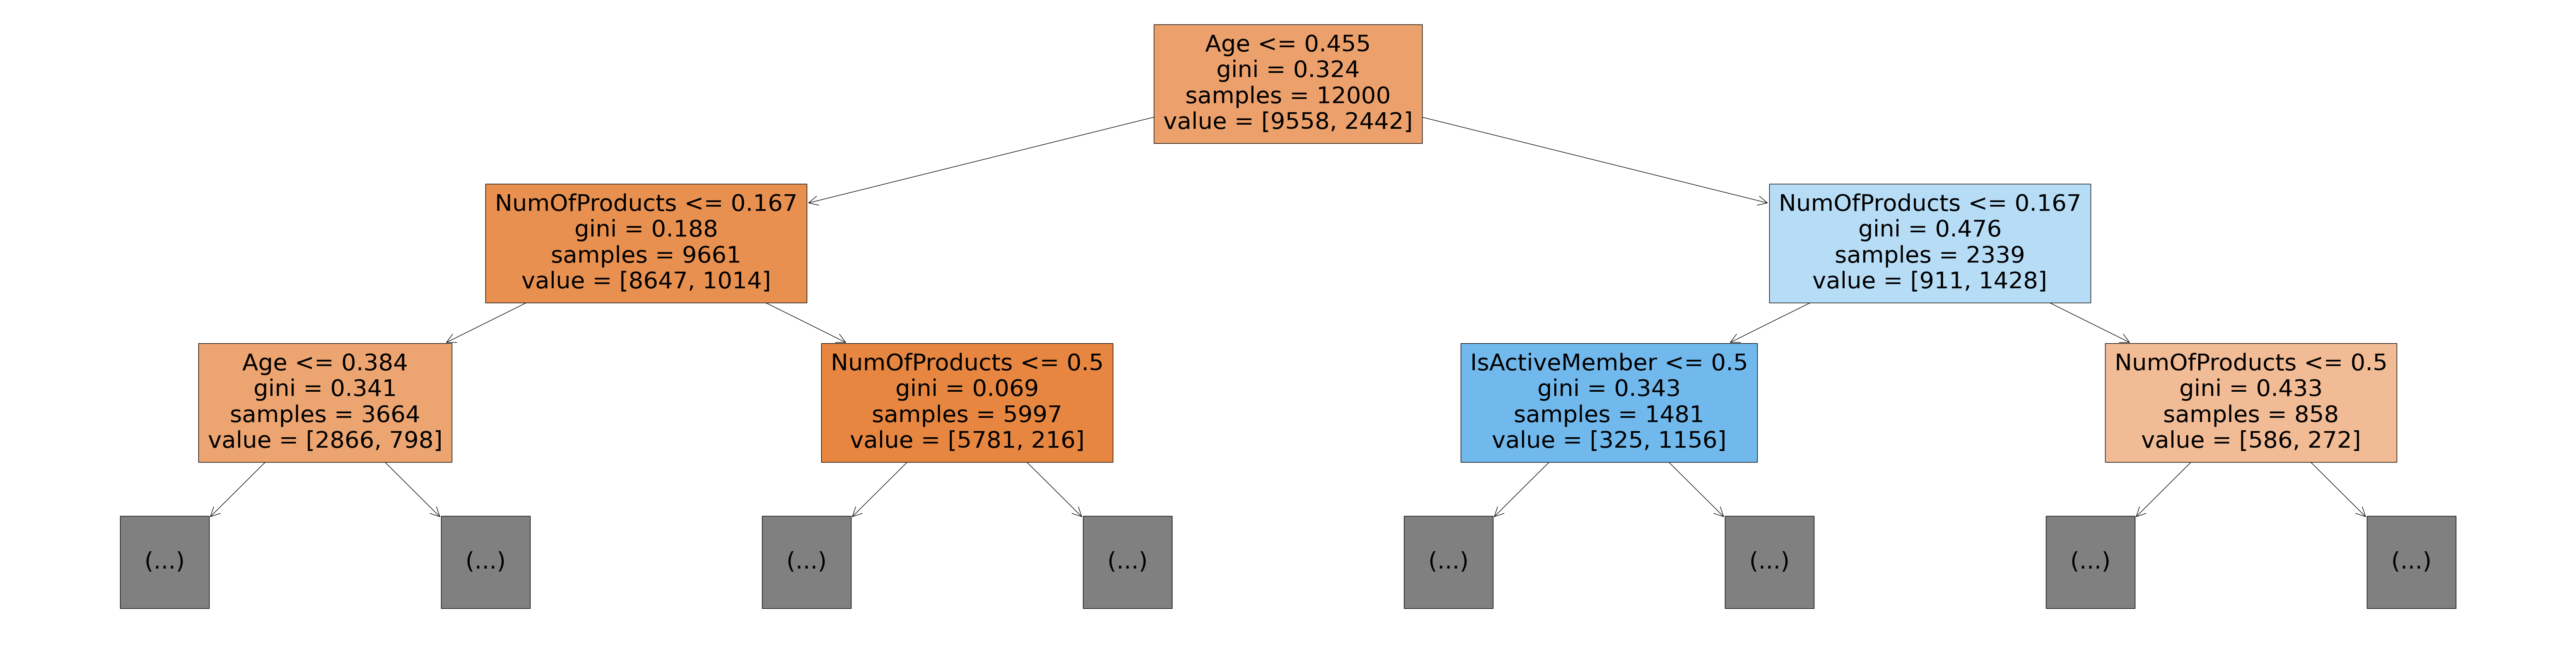

In [59]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Введіть ваші варіанти параметрів max_leaf_nodes і max_depth
max_leaf_nodes = int(input("Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): ") or None)
max_depth = int(input("Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): ") or None)

# Натренуємо модель з введеними параметрами
tree_clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=42)
tree_clf.fit(X_train, train_targets)

# Отримаємо глибину натренованого дерева
tree_depth = tree_clf.get_depth()

# Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
train_preds = tree_clf.predict_proba(X_train)[:, 1]
val_preds = tree_clf.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

# Виведемо результати для введених параметрів і глибини дерева
print(f"Параметри: max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}, глибина дерева={tree_depth}")
print(f"ROC AUC на тренувальних даних: {train_auc:.4f}")
print(f"ROC AUC на валідаційних даних: {val_auc:.4f}")


Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): 10
Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): 10
Параметри: max_leaf_nodes=10, max_depth=10, глибина дерева=5
ROC AUC на тренувальних даних: 0.9015
ROC AUC на валідаційних даних: 0.9002


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Введіть ваші варіанти параметрів max_leaf_nodes і max_depth
max_leaf_nodes = int(input("Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): ") or None)
max_depth = int(input("Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): ") or None)

# Натренуємо модель з введеними параметрами
tree_clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=42)
tree_clf.fit(X_train, train_targets)

# Отримаємо глибину натренованого дерева
tree_depth = tree_clf.get_depth()

# Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
train_preds = tree_clf.predict_proba(X_train)[:, 1]
val_preds = tree_clf.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

# Виведемо результати для введених параметрів і глибини дерева
print(f"Параметри: max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}, глибина дерева={tree_depth}")
print(f"ROC AUC на тренувальних даних: {train_auc:.4f}")
print(f"ROC AUC на валідаційних даних: {val_auc:.4f}")


Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): 20
Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): 10
Параметри: max_leaf_nodes=20, max_depth=10, глибина дерева=6
ROC AUC на тренувальних даних: 0.9179
ROC AUC на валідаційних даних: 0.9173


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Введіть ваші варіанти параметрів max_leaf_nodes і max_depth
max_leaf_nodes = int(input("Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): ") or None)
max_depth = int(input("Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): ") or None)

# Натренуємо модель з введеними параметрами
tree_clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=42)
tree_clf.fit(X_train, train_targets)

# Отримаємо глибину натренованого дерева
tree_depth = tree_clf.get_depth()

# Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
train_preds = tree_clf.predict_proba(X_train)[:, 1]
val_preds = tree_clf.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

# Виведемо результати для введених параметрів і глибини дерева
print(f"Параметри: max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}, глибина дерева={tree_depth}")
print(f"ROC AUC на тренувальних даних: {train_auc:.4f}")
print(f"ROC AUC на валідаційних даних: {val_auc:.4f}")


Введіть значення для max_leaf_nodes (або залиште порожнім для значення за замовчуванням): 50
Введіть значення для max_depth (або залиште порожнім для значення за замовчуванням): 20
Параметри: max_leaf_nodes=50, max_depth=20, глибина дерева=9
ROC AUC на тренувальних даних: 0.9312
ROC AUC на валідаційних даних: 0.9235


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

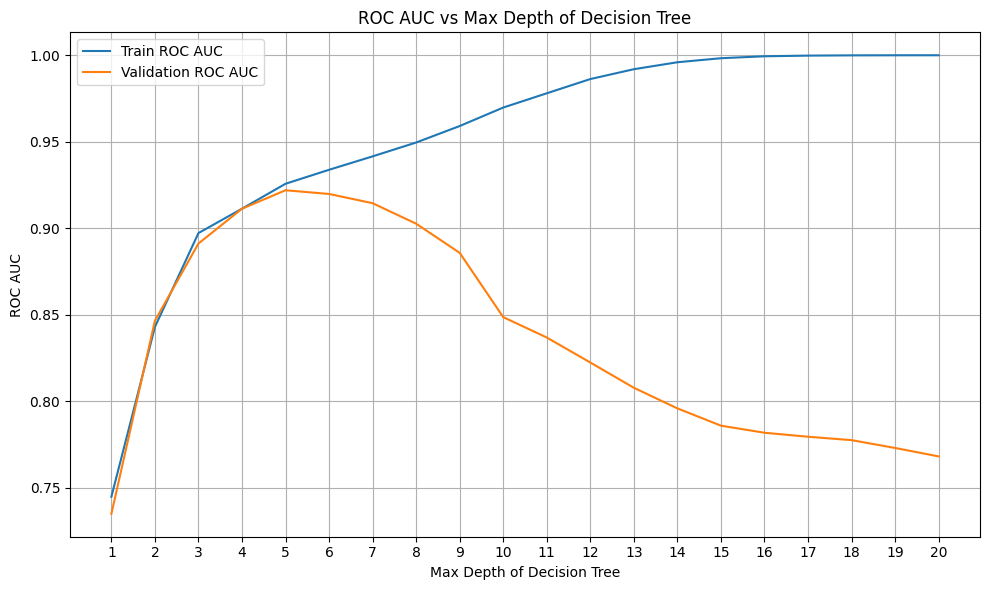

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Список для зберігання результатів
train_aucs = []
val_aucs = []

# Проходимо по значенням max_depth від 1 до 20
for depth in range(1, 21):
    # Натренуємо модель з поточним значенням max_depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, train_targets)

    # Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
    train_preds = tree_clf.predict_proba(X_train)[:, 1]
    val_preds = tree_clf.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(train_targets, train_preds)
    val_auc = roc_auc_score(val_targets, val_preds)

    # Зберігаємо результати
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_aucs, label='Train ROC AUC')
plt.plot(range(1, 21), val_aucs, label='Validation ROC AUC')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs Max Depth of Decision Tree')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import time

# Список параметрів, які ми спробуємо
params = [
    {'max_leaf_nodes': None, 'max_depth': None},
    {'max_leaf_nodes': 5, 'max_depth': 3},
    {'max_leaf_nodes': 10, 'max_depth': 5},
    {'max_leaf_nodes': 20, 'max_depth': 10},
    {'max_leaf_nodes': 30, 'max_depth': 10},
    {'max_leaf_nodes': 40, 'max_depth': 12},
    {'max_leaf_nodes': 50, 'max_depth': 15},
    {'max_leaf_nodes': 100, 'max_depth': 20},
]

best_params = None
best_train_auc = 0.0
best_val_auc = 0.0

start_time = time.time()

# Проходимо по всіх комбінаціях параметрів
for param_set in params:
    max_leaf_nodes = param_set['max_leaf_nodes']
    max_depth = param_set['max_depth']

    # Натренуємо модель з поточними параметрами
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=42)
    tree_clf.fit(X_train, train_targets)

    # Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
    train_preds = tree_clf.predict_proba(X_train)[:, 1]
    val_preds = tree_clf.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(train_targets, train_preds)
    val_auc = roc_auc_score(val_targets, val_preds)

    # Виведемо результати для поточних параметрів
    print(f"Параметри: max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}")
    print(f"ROC AUC на тренувальних даних: {train_auc:.4f}")
    print(f"ROC AUC на валідаційних даних: {val_auc:.4f}")
    print()

    # Порівняємо з кращими результатами
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_train_auc = train_auc
        best_params = param_set

# Виведемо кращі параметри і відповідні ROC AUC
print("Кращі параметри:")
print(best_params)
print(f"ROC AUC на тренувальних даних з кращими параметрами: {best_train_auc:.4f}")
print(f"ROC AUC на валідаційних даних з кращими параметрами: {best_val_auc:.4f}")

# Виміряємо час виконання
end_time = time.time()
execution_time = end_time - start_time
print(f"Час виконання: {execution_time:.2f} секунд")


Параметри: max_leaf_nodes=None, max_depth=None
ROC AUC на тренувальних даних: 1.0000
ROC AUC на валідаційних даних: 0.7741

Параметри: max_leaf_nodes=5, max_depth=3
ROC AUC на тренувальних даних: 0.8687
ROC AUC на валідаційних даних: 0.8595

Параметри: max_leaf_nodes=10, max_depth=5
ROC AUC на тренувальних даних: 0.9015
ROC AUC на валідаційних даних: 0.9002

Параметри: max_leaf_nodes=20, max_depth=10
ROC AUC на тренувальних даних: 0.9179
ROC AUC на валідаційних даних: 0.9173

Параметри: max_leaf_nodes=30, max_depth=10
ROC AUC на тренувальних даних: 0.9217
ROC AUC на валідаційних даних: 0.9191

Параметри: max_leaf_nodes=40, max_depth=12
ROC AUC на тренувальних даних: 0.9289
ROC AUC на валідаційних даних: 0.9241

Параметри: max_leaf_nodes=50, max_depth=15
ROC AUC на тренувальних даних: 0.9312
ROC AUC на валідаційних даних: 0.9235

Параметри: max_leaf_nodes=100, max_depth=20
ROC AUC на тренувальних даних: 0.9372
ROC AUC на валідаційних даних: 0.9115

Кращі параметри:
{'max_leaf_nodes': 40

In [64]:
# Оновлений список параметрів для експерименту
params = [
    {'max_leaf_nodes': None, 'max_depth': None},
    {'max_leaf_nodes': 30, 'max_depth': 5},
    {'max_leaf_nodes': 30, 'max_depth': 10},
    {'max_leaf_nodes': 30, 'max_depth': 15},
    {'max_leaf_nodes': 30, 'max_depth': 20},
    {'max_leaf_nodes': 40, 'max_depth': 5},
    {'max_leaf_nodes': 40, 'max_depth': 10},
    {'max_leaf_nodes': 40, 'max_depth': 15},
    {'max_leaf_nodes': 40, 'max_depth': 20},
    {'max_leaf_nodes': 50, 'max_depth': 5},
    {'max_leaf_nodes': 50, 'max_depth': 10},
    {'max_leaf_nodes': 50, 'max_depth': 15},
    {'max_leaf_nodes': 50, 'max_depth': 20},
    {'max_leaf_nodes': 60, 'max_depth': 5},
    {'max_leaf_nodes': 60, 'max_depth': 10},
    {'max_leaf_nodes': 60, 'max_depth': 15},
    {'max_leaf_nodes': 60, 'max_depth': 20},
]

best_params = None
best_train_auc = 0.0
best_val_auc = 0.0

start_time = time.time()

# Проходимо по всіх комбінаціях параметрів
for param_set in params:
    max_leaf_nodes = param_set['max_leaf_nodes']
    max_depth = param_set['max_depth']

    # Натренуємо модель з поточними параметрами
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=42)
    tree_clf.fit(X_train, train_targets)

    # Оцінимо модель за допомогою ROC AUC на тренувальних і валідаційних даних
    train_preds = tree_clf.predict_proba(X_train)[:, 1]
    val_preds = tree_clf.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(train_targets, train_preds)
    val_auc = roc_auc_score(val_targets, val_preds)

    # Виведемо результати для поточних параметрів
    print(f"Параметри: max_leaf_nodes={max_leaf_nodes}, max_depth={max_depth}")
    print(f"ROC AUC на тренувальних даних: {train_auc:.4f}")
    print(f"ROC AUC на валідаційних даних: {val_auc:.4f}")
    print()

    # Порівняємо з кращими результатами
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_train_auc = train_auc
        best_params = param_set

# Виведемо кращі параметри і відповідні ROC AUC
print("Кращі параметри:")
print(best_params)
print(f"ROC AUC на тренувальних даних з кращими параметрами: {best_train_auc:.4f}")
print(f"ROC AUC на валідаційних даних з кращими параметрами: {best_val_auc:.4f}")

# Виміряємо час виконання
end_time = time.time()
execution_time = end_time - start_time
print(f"Час виконання: {execution_time:.2f} секунд")


Параметри: max_leaf_nodes=None, max_depth=None
ROC AUC на тренувальних даних: 1.0000
ROC AUC на валідаційних даних: 0.7741

Параметри: max_leaf_nodes=30, max_depth=5
ROC AUC на тренувальних даних: 0.9257
ROC AUC на валідаційних даних: 0.9219

Параметри: max_leaf_nodes=30, max_depth=10
ROC AUC на тренувальних даних: 0.9217
ROC AUC на валідаційних даних: 0.9191

Параметри: max_leaf_nodes=30, max_depth=15
ROC AUC на тренувальних даних: 0.9217
ROC AUC на валідаційних даних: 0.9191

Параметри: max_leaf_nodes=30, max_depth=20
ROC AUC на тренувальних даних: 0.9217
ROC AUC на валідаційних даних: 0.9191

Параметри: max_leaf_nodes=40, max_depth=5
ROC AUC на тренувальних даних: 0.9257
ROC AUC на валідаційних даних: 0.9219

Параметри: max_leaf_nodes=40, max_depth=10
ROC AUC на тренувальних даних: 0.9289
ROC AUC на валідаційних даних: 0.9241

Параметри: max_leaf_nodes=40, max_depth=15
ROC AUC на тренувальних даних: 0.9289
ROC AUC на валідаційних даних: 0.9241

Параметри: max_leaf_nodes=40, max_dept

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [71]:
from sklearn.tree import DecisionTreeClassifier

# Натренувати модель з кращими параметрами
tree_clf = DecisionTreeClassifier(max_leaf_nodes=40, max_depth=10, random_state=42)
tree_clf.fit(data['X_train'], data['train_targets'])


DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40, random_state=42)

In [73]:
test_raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Змагання_Kaggle/test.csv", index_col=0)

In [74]:
# Отримання препроцесора та колонок введення з попередньої обробки
preprocessor = data['preprocessor']
input_cols = data['input_cols']

# Попередня обробка тестових даних
X_test = preprocess_new_data(test_raw_df, preprocessor, input_cols)

In [75]:
# Попередня обробка тестових даних
X_test = preprocess_new_data(test_raw_df, preprocessor, input_cols)

In [76]:
X_test

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,lbl__Gender_Male
0,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,1.0
1,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,1.0
2,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,1.0
3,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,1.0
4,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.496420,0.357143,1.0,0.000000,0.333333,1.0,1.0,0.248154,0.0,0.0,1.0,1.0
9996,0.589499,0.375000,0.9,0.000000,0.333333,1.0,1.0,0.712578,0.0,0.0,1.0,1.0
9997,0.818616,0.214286,0.9,0.000000,0.333333,1.0,0.0,0.024253,1.0,0.0,0.0,1.0
9998,0.391408,0.357143,0.6,0.690650,0.000000,1.0,0.0,0.632348,1.0,0.0,0.0,1.0


In [78]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,1.0
1,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,0.0
2,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,1.0
3,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,1.0
4,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.482100,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,0.0
11996,0.577566,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,0.0
11997,0.453461,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,1.0
11998,0.379475,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,1.0


In [81]:
print(X_train.columns)
print(X_test.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')
Index(['num__CreditScore', 'num__Age', 'num__Tenure', 'num__Balance',
       'num__NumOfProducts', 'num__HasCrCard', 'num__IsActiveMember',
       'num__EstimatedSalary', 'cat__Geography_France',
       'cat__Geography_Germany', 'cat__Geography_Spain', 'lbl__Gender_Male'],
      dtype='object')


In [85]:
# Перейменування назв колонок у тестовому DataFrame
X_test.columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                       'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany',
                       'Geography_Spain', 'Gender_Male']



In [86]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,1.0
1,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,1.0
2,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,1.0
3,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,1.0
4,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.496420,0.357143,1.0,0.000000,0.333333,1.0,1.0,0.248154,0.0,0.0,1.0,1.0
9996,0.589499,0.375000,0.9,0.000000,0.333333,1.0,1.0,0.712578,0.0,0.0,1.0,1.0
9997,0.818616,0.214286,0.9,0.000000,0.333333,1.0,0.0,0.024253,1.0,0.0,0.0,1.0
9998,0.391408,0.357143,0.6,0.690650,0.000000,1.0,0.0,0.632348,1.0,0.0,0.0,1.0


In [89]:
# Передбачення на тестових даних
test_predictions = tree_clf.predict_proba(X_test)[:, 1]


In [91]:
# Додавання прогнозів до тестового набору
test_raw_df['Exited'] = test_predictions

# Збереження результатів у файл для submission
submission_df = test_raw_df[['Exited']]
submission_df.to_csv('submission_1107.csv')

# Підтвердження про збереження
print("Submission файл збережено успішно!")

Submission файл збережено успішно!
